In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import math
import copy

# 1. Метод Ньютона для уравнения

## 1.1 Локализация корней

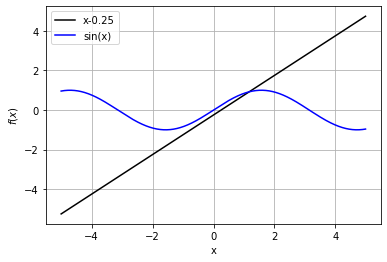

In [2]:
X=np.arange(-5, 5, 0.01)
Y1=[X[i]-0.25 for i in range(len(X)) ]
Y2=[np.sin(X[i]) for i in range(len(X))]
plt.plot(X,Y1,'k', label='x-0.25')
plt.plot(X,Y2,'b', label='sin(x)')
plt.grid()
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.legend()

In [3]:
sy.var('x')
f=x-sy.sin(x)-0.25
df=sy.diff(f, x)
eps=0.0001
x0=0
x1=1 # начальное приближение
while (abs(x1-x0)>eps):
        x0=x1
        x1=x0-float(f.subs(x, x0)/df.subs(x, x0))
print('x0=', round(x0, 5))

x0= 1.17123


# 2. Метод Ньютона для систем нелинейных алгебраических уравнений

## 2.1 Локализация корней

In [4]:
sy.var('y')

y

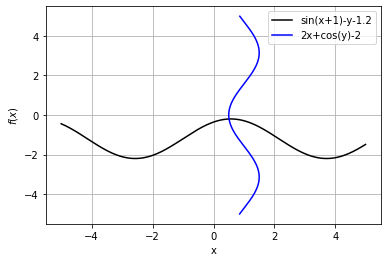

In [5]:
X=np.arange(-5, 5, 0.01)
Y1=[np.sin(X[i]+1)-1.2 for i in range(len(X))]
Y2=[(-np.cos(X[i])+2)/2 for i in range(len(X))]
plt.plot(X,Y1,'k', label='sin(x+1)-y-1.2')
plt.plot(Y2, X,'b', label='2x+cos(y)-2')
plt.grid()
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.legend()

вспомогательные функции 2-норм вектора и матрицы

In [6]:
def norm2vec(x):
    # возьмем каждый элемент вектора по модулю
    x=[a**2 for a in x ]
    return sum(x)

### Метод Гаусса

In [8]:
def change_lines(A, j):
    max_a = 0  # найдем максимальный модуль элемента и строку, содержащую данный элемент поменяем с j строкой
    n_a = 0  # номер строки, содержащий максимальный элемент j столбца

    for i in range(len(A)):
        if math.fabs(A[i][j]) >= max_a:
            max_a = A[i][j]
            n_a = i
    if j == 0:  # хотим поменять только первую строку, остальные не стоит
        A[j], A[n_a] = A[n_a], A[j]

    return max_a

In [9]:
def gauss(a, b):
    a = a.tolist()
    b = b.tolist()
    A = []
    for i in range(len(b)):
        A.append(copy.deepcopy(a[i]))
        A[i].append(copy.deepcopy(b[i]))  # матрица со столбцом b

    for j in range(len(A[0]) - 2):  # приводим матрицу к диагональному виду
        max_a = change_lines(A, j)
        for i in range(len(A) + 1):  # делим на старший коэффициент
            if max_a != 0:
                A[j][i] /= max_a
            else:
                return 0

        for k in range(len(A[j]) - 2 - j):  # прямой ход метода Гаусса
            a = -A[k + 1 + j][j]  # коэффициент перед первой строкой
            temp = copy.deepcopy(A[j])  # дубликат "рабочей" строки для сложения с ней низлежащих строк матрицы
            for i in range(j, len(A[j])):
                temp[i] *= a  # умножение на коэффициент для обнуления первого ненулевого элемента в низлежащих строках
                A[k + 1 + j][i] += temp[i]

    a = A[len(A) - 1][len(A) - 1]  # далее применение к последнему элементу матрицы b
    A[len(A) - 1][len(A)] /= a

    for j in range(len(A) - 1, 0, -1):
        for k in range(j, 0, -1):  # обратный ход метода Гаусса
            a = -A[k - 1][k]  # коэффициент перед первой строкой
            temp = copy.deepcopy(A[j])  # дубликат "рабочей" строки для сложения с ней низлежащих строк матрицы
            for i in range(j, len(A) + 1):
                temp[i] *= a  # умножение на коэффициент для обнуления первого ненулевого элемента в низлежащих строках
                A[k - 1][i] += temp[i]
    res = []
    for i in range(len(A)):
        res.append(A[i][len(A)])

    return res

## решение системы

In [10]:
f=[sy.sin(x+1)-y-1.2, 2*x+sy.cos(y)-2]
J=[[sy.diff(f[0], x), sy.diff(f[0], y)], [sy.diff(f[1], x), sy.diff(f[1], y)]] #Якобиан системы
x0=np.array([0, 0], dtype=float)
x1=np.array([1,0], dtype=float) # начальное приближение
eps=10**(-4)
def A(x1):
    return np.array([[J[0][0].subs([(x, x1[0]), (y, x1[1])]), J[0][1].subs([(x, x1[0]), (y, x1[1])])],
                    [J[1][0].subs([(x, x1[0]), (y, x1[1])]), J[1][1].subs([(x, x1[0]), (y, x1[1])])]], 
                    dtype=float)
def F(x1):
    return np.array([-f[0].subs([(x, x1[0]), (y, x1[1])]), -f[1].subs([(x, x1[0]), (y, x1[1])])])
while(norm2vec(x1-x0)>eps):
    x0[0]=x1[0]
    x0[1]=x1[1]
    M=gauss(A(x1), F(x1))
    x1[0]+=M[0]
    x1[1]+=M[1]
x1

array([ 0.51014953, -0.20183228])